In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import yfinance as yf
import pandas_datareader.data as web
import datetime as dt

ModuleNotFoundError: No module named 'matplotlib.backends.registry'

In [ ]:
# code to extract 15 minute data from Yahoo Finance
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def download_intraday_data(ticker, start_date, end_date, interval="15m", chunk_days=30):
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    df_all = []

    while start < end:
        chunk_end = min(start + timedelta(days=chunk_days), end)
        print(f"Fetching: {start.date()} to {chunk_end.date()}")

        df = yf.download(
            ticker,
            start=start.strftime('%Y-%m-%d'),
            end=chunk_end.strftime('%Y-%m-%d'),
            interval=interval,
            progress=False
        )
        
        if not df.empty:
            df_all.append(df)

        # Add a buffer of 1 minute to avoid overlapping rows
        start = chunk_end + timedelta(minutes=1)

    # Combine all chunks
    if df_all:
        final_df = pd.concat(df_all)
        final_df = final_df[~final_df.index.duplicated(keep='first')]  # Remove any duplicate rows
        return final_df
    else:
        print("No data returned.")
        return pd.DataFrame()

# Example usage:
df_spy_15m = download_intraday_data("SPY", start_date="2023-12-01", end_date="2024-04-01", interval="15m")
print(df_spy_15m.head())


# Add forecast vs actual data

In [506]:
import openpyxl
sheets_dict = pd.read_excel('act vs forecast.xlsx', sheet_name=None)

# Extract each sheet into separate DataFrames
df1 = sheets_dict[list(sheets_dict.keys())[0]]
df2 = sheets_dict[list(sheets_dict.keys())[1]]
df3 = sheets_dict[list(sheets_dict.keys())[2]]
df4 = sheets_dict[list(sheets_dict.keys())[3]]
df5 = sheets_dict[list(sheets_dict.keys())[4]]
df6 = sheets_dict[list(sheets_dict.keys())[5]]
df7 = sheets_dict[list(sheets_dict.keys())[6]]

# Optional: print sheet names to verify
print("Sheet names:", list(sheets_dict.keys()))

Sheet names: ['GDP', 'nonfarm', 'CPI', 'PPI', 'unemployment rate', 'core_PCE', 'FOMC']


In [507]:
df2['Release Date'].head()

0    Apr 04, 2025 (Mar)
1    Mar 07, 2025 (Feb)
2    Feb 07, 2025 (Jan)
3    Jan 10, 2025 (Dec)
4    Dec 06, 2024 (Nov)
Name: Release Date, dtype: object

In [508]:

for df in [df1, df2, df3, df4, df5,df6,df7]:
    #df = df.drop('Time', axis=1)
    df['Release Date'] = df['Release Date'].str.replace(r"\s*\(.*\)", "", regex=True)  # remove (anything)
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%b %d, %Y')
    df['Release Date'] = df['Release Date'].dt.date

df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release Date       126 non-null    object 
 1   Time               126 non-null    object 
 2   Actual_core_PCE    125 non-null    float64
 3   Forecast_core_PCE  119 non-null    float64
 4   Previous_core_PCE  126 non-null    float64
dtypes: float64(3), object(2)
memory usage: 5.0+ KB


In [509]:
df1.drop('Time', axis=1, inplace=True)
df2.drop('Time', axis=1, inplace=True)
df3.drop('Time', axis=1, inplace=True)
df4.drop('Time', axis=1, inplace=True)
df5.drop('Time', axis=1, inplace=True)
df6.drop('Time', axis=1, inplace=True)
df7.drop('Time', axis=1, inplace=True)


In [510]:
df4.head(30)

,Release Date,Actual_PPI,Forecast_PPI,Previous_PPI
0,2025-04-11,NaN,0.033,0.032
1,2025-03-13,0.032,0.033,0.037
2,2025-02-13,0.035,0.032,0.035
3,2025-01-14,0.033,0.035,0.030
4,2024-12-12,0.030,0.026,0.026
5,2024-11-14,0.024,0.023,0.019
6,2024-10-11,0.018,0.016,0.019
7,2024-09-12,0.017,0.018,0.021
8,2024-08-13,0.022,0.023,0.027
9,2024-07-12,0.026,0.023,0.024


In [511]:

df1['Release Date'] = pd.to_datetime(df1['Release Date'])
df2['Release Date'] = pd.to_datetime(df2['Release Date'])
df3['Release Date'] = pd.to_datetime(df3['Release Date'])
df4['Release Date'] = pd.to_datetime(df4['Release Date'])
df5['Release Date'] = pd.to_datetime(df5['Release Date'])
df6['Release Date'] = pd.to_datetime(df6['Release Date'])
df7['Release Date'] = pd.to_datetime(df7['Release Date'])
df7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Release Date   145 non-null    datetime64[ns]
 1   Actual_FOMC    139 non-null    float64       
 2   Forecast_FOMC  135 non-null    float64       
 3   Previous_FOMC  140 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.7 KB


In [512]:
df4.head(30)

,Release Date,Actual_PPI,Forecast_PPI,Previous_PPI
0,2025-04-11,NaN,0.033,0.032
1,2025-03-13,0.032,0.033,0.037
2,2025-02-13,0.035,0.032,0.035
3,2025-01-14,0.033,0.035,0.030
4,2024-12-12,0.030,0.026,0.026
5,2024-11-14,0.024,0.023,0.019
6,2024-10-11,0.018,0.016,0.019
7,2024-09-12,0.017,0.018,0.021
8,2024-08-13,0.022,0.023,0.027
9,2024-07-12,0.026,0.023,0.024


In [513]:
for df in [df1, df2, df3, df4, df5,df6,df7]:
    df.rename(columns={'Release Date': 'ds'}, inplace=True)

df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             145 non-null    datetime64[ns]
 1   Actual_FOMC    139 non-null    float64       
 2   Forecast_FOMC  135 non-null    float64       
 3   Previous_FOMC  140 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.7 KB


In [514]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            205 non-null    datetime64[ns]
 1   Actual_GDP    204 non-null    float64       
 2   Forecast_GDP  204 non-null    float64       
 3   Previous_GDP  205 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.5 KB


# Add israeli holidays 

In [517]:
isr_holidays = pd.read_csv(r'C:\Users\OMER\Downloads\Jewish_Israeli_holidays.csv')
isr_holidays.info()
isr_holidays['date'] = pd.to_datetime(isr_holidays['date'], format='%m/%d/%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1050 non-null   object
 1   eng_name  1050 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


In [518]:
#isr_holidays.head()
isr_holidays.rename(columns={'date': 'ds','eng_name':'holiday'}, inplace=True)
isr_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       1050 non-null   datetime64[ns]
 1   holiday  1050 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.5+ KB


The varible i am entering to the prediction :

GOLD,SILVER,DXY,JPY/USD,EUR/USD,OIL,NET GAS,10 YEAR YIELD,2 YEAR YIELD, BITCOIN,VIX

To creat:
gold/silver, yield curve, presentage change, angel of movment, number of up/down days in a row, dummi for if bid data day & dummie if supprise up/down.

Advance:
options analysis : IV, IV rank, SKEW, ASK/BID RATIO (on put and call), OI & col analysis - where is a lot of oi (put/call) is traders raise or dropping OI.

## 5 years of data

In [714]:
start = "2017-01-01"
end = "2025-04-17" #04

## 2 year yields - not from yahoo

In [715]:
#start = datetime.datetime(2010, 1, 1)
#end = datetime.datetime.today()

# 'DGS2' = 2-Year Constant Maturity Treasury yield (%)
yield_2y = web.DataReader('DGS2', 'fred', start, end)
#yield_2y =yield_2y.reset_index()
#yield_2y =yield_2y.drop('DATE',axis=1)


print(yield_2y.tail())

            DGS2
DATE            
2025-04-11  3.96
2025-04-14  3.84
2025-04-15  3.84
2025-04-16  3.77
2025-04-17  3.81


In [ ]:
#print(len(yield_2y))

1382


## Target varible: SPY

In [716]:
#aapl = yf.download("AAPL", start=start, end=end)
#print(data.tail())
SPY = yf.download("SPY", start=start, end=end)[['Close', 'Volume','High','Low']]
SPY.columns = ['SPY_Close', 'SPY_Volume', 'SPY_High', 'SPY_Low']
print(SPY.head())
#BIT = yf.download("GLD", start=start,end=end)

[*********************100%***********************]  1 of 1 completed

             SPY_Close  SPY_Volume    SPY_High     SPY_Low
Date                                                      
2017-01-03  196.697174    91366500  197.212405  195.509515
2017-01-04  197.867355    78744400  198.015811  197.020275
2017-01-05  197.710129    78379000  197.867326  196.906715
2017-01-06  198.417511    71559900  198.889075  197.273506
2017-01-09  197.762558    46939700  198.295258  197.727619


## High low range

In [717]:
SPY['high-low'] = SPY['SPY_High'] - SPY['SPY_Low']

SPY['before_high-low'] = SPY['high-low'].shift(1)

SPY = SPY.drop(['SPY_High','SPY_Low'],axis=1)
#SPY= SPY.dropna()

In [ ]:
#print(SPY.index)
#SPY=SPY.reset_index()
#SPY =SPY.rename(columns={'Date':'ds'})

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08',
               '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14',
               '2025-04-15', '2025-04-16'],
              dtype='datetime64[ns]', name='Date', length=1330, freq=None)


In [718]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SPY_Close        2084 non-null   float64
 1   SPY_Volume       2084 non-null   int64  
 2   high-low         2084 non-null   float64
 3   before_high-low  2083 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 81.4 KB


# Add events:

In [345]:
events = pd.read_csv(r'cpi_release_dates_2020_2025.csv')

events =events.rename(columns={'Date':'ds'})
events['ds'] = pd.to_datetime(events['ds'],format='%Y-%m-%d')
SPY_events =SPY.copy()
event_grouped = events.groupby('ds')['event'].apply(lambda x: ', '.join(x)).reset_index()
SPY_events = SPY_events.merge(event_grouped, on='ds', how='left')

#print(SPY_events[['ds','event_y']].head(20))
SPY_events['event'] = SPY_events['event'].fillna('none event')  # Fill missing events
#SPY_events = SPY_events.drop(columns=['event_y','event_x'])
SPY_events.info()

KeyError: 'ds'

In [ ]:
#SPY_events['is_event'] = SPY_events['event'].apply(lambda x: 1 if x != 'none event' else 0)

In [48]:
print(SPY_events.iloc[15:30, :])

           ds   SPY_Close  SPY_Volume                   event
15 2020-01-23  306.623322    51963000              none event
16 2020-01-24  303.896454    87578400              none event
17 2020-01-27  299.025299    84062500              none event
18 2020-01-28  302.158813    63834000              none event
19 2020-01-29  301.909119    53888900            FOMC Meeting
20 2020-01-30  302.888977    75491800                     GDP
21 2020-01-31  297.389160   113845600              none event
22 2020-02-03  299.598358    69083000  ISM Manufacturing ,PMI
23 2020-02-04  304.164612    62573200              none event
24 2020-02-05  307.677032    65951100              none event
25 2020-02-06  308.712341    50359700              none event
26 2020-02-07  307.066986    64139400         Nonfarm Payroll
27 2020-02-10  309.359314    42070000              none event
28 2020-02-11  309.895538    54864500              none event
29 2020-02-12  311.892120    43992700                     CPI


In [724]:
SPY_events =SPY.drop(['high-low','before_high-low'],axis=1)
SPY_events.reset_index(inplace=True)
SPY_events.rename(columns={'Date':'ds'}, inplace=True)
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          2084 non-null   datetime64[ns]
 1   SPY_Close   2084 non-null   float64       
 2   SPY_Volume  2084 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 49.0 KB


# Add events with forecast

In [725]:

SPY_events['month'] = SPY_events['ds'].dt.month
SPY_events['day'] = SPY_events['ds'].dt.day
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          2084 non-null   datetime64[ns]
 1   SPY_Close   2084 non-null   float64       
 2   SPY_Volume  2084 non-null   int64         
 3   month       2084 non-null   int32         
 4   day         2084 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 65.2 KB


In [737]:

SPY_events_copy = SPY_events.copy()
for df in [df1, df2, df3, df4, df5,df6,df7]:
    # Merge each DataFrame with SPY_events_copy
    SPY_events_copy = SPY_events_copy.merge(df, on='ds', how='left')
    # Fill missing values with 'none event
    #SPY_events_copy['event'] = SPY_events_copy['event'].fillna('none event')

SPY_events_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          2085 non-null   datetime64[ns]
 1   SPY_Close                   2085 non-null   float64       
 2   SPY_Volume                  2085 non-null   int64         
 3   month                       2085 non-null   int32         
 4   day                         2085 non-null   int32         
 5   Actual_GDP                  98 non-null     float64       
 6   Forecast_GDP                98 non-null     float64       
 7   Previous_GDP                98 non-null     float64       
 8   Actual_nonfarm              98 non-null     object        
 9   Forecast_nonfarm            98 non-null     object        
 10  Previous_nonfarm            98 non-null     object        
 11  Actual_CPI                  97 non-null     float64     

In [738]:
nan_cols = SPY_events_copy.columns[SPY_events_copy.isna().any()].tolist()
print(nan_cols)


['Actual_GDP', 'Forecast_GDP', 'Previous_GDP', 'Actual_nonfarm', 'Forecast_nonfarm', 'Previous_nonfarm', 'Actual_CPI', 'Forecast_CPI', 'Previous_CPI', 'Actual_PPI', 'Forecast_PPI', 'Previous_PPI', 'Actual_unemployment rate', 'Forecast_unemployment rate', 'Previous_unemployment rate', 'Actual_core_PCE', 'Forecast_core_PCE', 'Previous_core_PCE', 'Actual_FOMC', 'Forecast_FOMC', 'Previous_FOMC']


In [739]:
for col in nan_cols:
    SPY_events_copy[col] = SPY_events_copy[col].fillna('none event')

SPY_events_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          2085 non-null   datetime64[ns]
 1   SPY_Close                   2085 non-null   float64       
 2   SPY_Volume                  2085 non-null   int64         
 3   month                       2085 non-null   int32         
 4   day                         2085 non-null   int32         
 5   Actual_GDP                  2085 non-null   object        
 6   Forecast_GDP                2085 non-null   object        
 7   Previous_GDP                2085 non-null   object        
 8   Actual_nonfarm              2085 non-null   object        
 9   Forecast_nonfarm            2085 non-null   object        
 10  Previous_nonfarm            2085 non-null   object        
 11  Actual_CPI                  2085 non-null   object      

In [535]:
SPY_events_copy[['ds','Actual_nonfarm','Previous_nonfarm','Forecast_nonfarm']].tail(30)

,ds,Actual_nonfarm,Previous_nonfarm,Forecast_nonfarm
1299,2025-03-06,none event,none event,none event
1300,2025-03-07,151K,125K,159K
1301,2025-03-10,none event,none event,none event
1302,2025-03-11,none event,none event,none event
1303,2025-03-12,none event,none event,none event
1304,2025-03-13,none event,none event,none event
1305,2025-03-14,none event,none event,none event
1306,2025-03-17,none event,none event,none event
1307,2025-03-18,none event,none event,none event
1308,2025-03-19,none event,none event,none event


In [536]:
print(SPY_events_copy.columns.to_list())

['ds', 'SPY_Close', 'SPY_Volume', 'high-low', 'before_high-low', 'month', 'day', 'Actual_GDP', 'Forecast_GDP', 'Previous_GDP', 'Actual_nonfarm', 'Forecast_nonfarm', 'Previous_nonfarm', 'Actual_CPI', 'Forecast_CPI', 'Previous_CPI', 'Actual_PPI', 'Forecast_PPI', 'Previous_PPI', 'Actual_unemployment rate', 'Forecast_unemployment rate', 'Previous_unemployment rate', 'Actual_core_PCE', 'Forecast_core_PCE', 'Previous_core_PCE', 'Actual_FOMC', 'Forecast_FOMC', 'Previous_FOMC']


## Creating vs forecast ans vs previws columns:

In [740]:
events = ['CPI', 'GDP', 'PPI','nonfarm','unemployment rate','core_PCE','FOMC']  # Add your full event list

def clean_value(val):
    if val == 'none event' or pd.isna(val):
        return np.nan
    #try:
    val = str(val).replace(',', '')
    val = str(val).replace('K', '')  # Remove 'K'
    return float(val)
    #except:
     #   return np.nan


for event in events:
    actual_col = f'Actual_{event}'
    forecast_col = f'Forecast_{event}'
    previous_col = f'Previous_{event}'

    # Columns to be created
    vs_forecast_col = f'{event}_vs_forecast'
    vs_previous_col = f'{event}_vs_previous'

    def compare_values(a, b):
        a = clean_value(a)
        b = clean_value(b)
    
        if pd.isna(a) or pd.isna(b):
            return np.nan
        return 1 if a > b else -1 if a < b else 0


     # Apply for forecast
    SPY_events_copy[vs_forecast_col] = SPY_events_copy[[actual_col, forecast_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)

    # Apply for previous
    SPY_events_copy[vs_previous_col] = SPY_events_copy[[actual_col, previous_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)


C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\3048081103.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SPY_events_copy[vs_forecast_col] = SPY_events_copy[[actual_col, forecast_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\3048081103.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SPY_events_copy[vs_previous_col] = SPY_events_copy[[actual_col, previous_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\3048081103.py:33: FutureWarning: Series.__getitem__ treating keys as positi

In [741]:
SPY_events_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2085 non-null   datetime64[ns]
 1   SPY_Close                      2085 non-null   float64       
 2   SPY_Volume                     2085 non-null   int64         
 3   month                          2085 non-null   int32         
 4   day                            2085 non-null   int32         
 5   Actual_GDP                     2085 non-null   object        
 6   Forecast_GDP                   2085 non-null   object        
 7   Previous_GDP                   2085 non-null   object        
 8   Actual_nonfarm                 2085 non-null   object        
 9   Forecast_nonfarm               2085 non-null   object        
 10  Previous_nonfarm               2085 non-null   object        
 11  Actual_CPI       

In [730]:
SPY_events_copy[['ds','nonfarm_vs_forecast']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   2085 non-null   datetime64[ns]
 1   nonfarm_vs_forecast  98 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.7 KB


# Handle nulls
I will use multiple methods

In [731]:
print(SPY_events_copy[['ds','Actual_FOMC']].iloc[60:90])

           ds Actual_FOMC
60 2017-03-30  none event
61 2017-03-31  none event
62 2017-04-03  none event
63 2017-04-04  none event
64 2017-04-05  none event
65 2017-04-06  none event
66 2017-04-07  none event
67 2017-04-10  none event
68 2017-04-11  none event
69 2017-04-12  none event
70 2017-04-13  none event
71 2017-04-17  none event
72 2017-04-18  none event
73 2017-04-19  none event
74 2017-04-20  none event
75 2017-04-21  none event
76 2017-04-24  none event
77 2017-04-25  none event
78 2017-04-26  none event
79 2017-04-27  none event
80 2017-04-28  none event
81 2017-05-01  none event
82 2017-05-02  none event
83 2017-05-03        0.01
84 2017-05-04  none event
85 2017-05-05  none event
86 2017-05-08  none event
87 2017-05-09  none event
88 2017-05-10  none event
89 2017-05-11  none event


## The event column is not the best there is some errors there

In [742]:

# List of actual columns for each event
actual_cols = ['Actual_CPI', 'Actual_GDP', 'Actual_PPI', 'Actual_nonfarm','Actual_unemployment rate','Actual_core_PCE','Actual_FOMC']  # Add others as needed

# Create 'is_event' column
SPY_events_copy['is_event'] = SPY_events_copy[actual_cols].apply(
    lambda row: 1 if any(val != 'none event' for val in row) else 0, axis=1
)

SPY_events_copy.tail(30)

,ds,SPY_Close,SPY_Volume,month,day,Actual_GDP,Forecast_GDP,Previous_GDP,Actual_nonfarm,Forecast_nonfarm,...,PPI_vs_previous,nonfarm_vs_forecast,nonfarm_vs_previous,unemployment rate_vs_forecast,unemployment rate_vs_previous,core_PCE_vs_forecast,core_PCE_vs_previous,FOMC_vs_forecast,FOMC_vs_previous,is_event
2055,2025-03-06,570.992371,80094900,3,6,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2056,2025-03-07,574.192688,81158800,3,7,none event,none event,none event,151K,159K,...,NaN,-1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
2057,2025-03-10,558.898743,99326600,3,10,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2058,2025-03-11,554.252686,88102100,3,11,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2059,2025-03-12,557.193848,69588200,3,12,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2060,2025-03-13,549.766174,74079400,3,13,none event,none event,none event,none event,none event,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2061,2025-03-14,561.122009,62660300,3,14,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2062,2025-03-17,565.449036,49008700,3,17,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2063,2025-03-18,559.337402,66041400,3,18,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2064,2025-03-19,565.429077,66556000,3,19,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1


In [543]:
SPY_events_copy['Actual_FOMC'].head()

0    none event
1    none event
2    none event
3    none event
4    none event
Name: Actual_FOMC, dtype: object

In [743]:
# Initialize a new column
days_since_fomc = []
counter = None

for event in SPY_events_copy['Actual_FOMC']:
    if event != 'none event': 
        counter = 0
    elif counter is not None:
        counter += 1
    days_since_fomc.append(counter)

SPY_events_copy['days_since_fomc'] = days_since_fomc

In [552]:
SPY_events_copy['days_since_fomc'].iloc[60:90]

60    11.0
61    12.0
62    13.0
63    14.0
64    15.0
65    16.0
66    17.0
67    18.0
68    19.0
69    20.0
70    21.0
71    22.0
72    23.0
73    24.0
74    25.0
75    26.0
76    27.0
77    28.0
78    29.0
79    30.0
80     0.0
81     1.0
82     2.0
83     3.0
84     4.0
85     5.0
86     6.0
87     7.0
88     8.0
89     9.0
Name: days_since_fomc, dtype: float64

In [744]:
cols_to_drop = ['Forecast_CPI', 'Previous_CPI', 'Forecast_PPI', 'Previous_PPI', 'Forecast_GDP', 'Previous_GDP', 'Forecast_nonfarm', 'Previous_nonfarm', 'Forecast_unemployment rate', 'Previous_unemployment rate','Forecast_core_PCE', 'Previous_core_PCE','Forecast_FOMC', 'Previous_FOMC']
SPY_events_copy.drop(columns=cols_to_drop, inplace=True)
SPY_events_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2085 non-null   datetime64[ns]
 1   SPY_Close                      2085 non-null   float64       
 2   SPY_Volume                     2085 non-null   int64         
 3   month                          2085 non-null   int32         
 4   day                            2085 non-null   int32         
 5   Actual_GDP                     2085 non-null   object        
 6   Actual_nonfarm                 2085 non-null   object        
 7   Actual_CPI                     2085 non-null   object        
 8   Actual_PPI                     2085 non-null   object        
 9   Actual_unemployment rate       2085 non-null   object        
 10  Actual_core_PCE                2085 non-null   object        
 11  Actual_FOMC      

In [745]:
SPY_events = SPY_events_copy.copy()

In [49]:
events.head()

,ds,event
0,2020-01-03,"ISM Manufacturing ,PMI"
1,2020-01-10,Nonfarm Payroll
2,2020-01-14,PPI
3,2020-01-14,CPI
4,2020-01-29,FOMC Meeting


In [746]:
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2085 non-null   datetime64[ns]
 1   SPY_Close                      2085 non-null   float64       
 2   SPY_Volume                     2085 non-null   int64         
 3   month                          2085 non-null   int32         
 4   day                            2085 non-null   int32         
 5   Actual_GDP                     2085 non-null   object        
 6   Actual_nonfarm                 2085 non-null   object        
 7   Actual_CPI                     2085 non-null   object        
 8   Actual_PPI                     2085 non-null   object        
 9   Actual_unemployment rate       2085 non-null   object        
 10  Actual_core_PCE                2085 non-null   object        
 11  Actual_FOMC      

In [736]:
SPY_events_copy.head()

,ds,SPY_Close,SPY_Volume,month,day,Actual_GDP,Actual_nonfarm,Actual_CPI,Actual_PPI,Actual_unemployment rate,...,nonfarm_vs_forecast,nonfarm_vs_previous,unemployment rate_vs_forecast,unemployment rate_vs_previous,core_PCE_vs_forecast,core_PCE_vs_previous,FOMC_vs_forecast,FOMC_vs_previous,is_event,days_since_fomc
0,2017-01-03,196.697174,91366500,1,3,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2017-01-04,197.867355,78744400,1,4,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2017-01-05,197.710129,78379000,1,5,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2017-01-06,198.417511,71559900,1,6,none event,156K,none event,none event,0.047,...,-1.0,-1.0,0.0,1.0,NaN,NaN,NaN,NaN,1,NaN
4,2017-01-09,197.762558,46939700,1,9,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:

#SPY_copy = SPY.copy()
#SPY = pd.concat([SPY, SPY_events['event']], axis=1)
#SPY.head()

,ds,SPY_Close,SPY_Volume,event,event,event
0,2020-01-02,300.291656,59151200.0,none event,none event,none event
1,2020-01-03,298.017700,77709700.0,ISM,"ISM Manufacturing ,PMI","ISM Manufacturing ,PMI"
2,2020-01-06,299.154602,55653900.0,none event,none event,none event
3,2020-01-07,298.313477,40496400.0,none event,none event,none event
4,2020-01-08,299.903320,68296000.0,none event,none event,none event


# export the data with events to pickle and csv

I left some nuuls value in the vs forcast columns , still didnt decide how to handle them , if to code them as null or somthing else


In [747]:
# merge the israely holidays
SPY_events = SPY_events.merge(isr_holidays, on='ds', how='left')
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2086 non-null   datetime64[ns]
 1   SPY_Close                      2086 non-null   float64       
 2   SPY_Volume                     2086 non-null   int64         
 3   month                          2086 non-null   int32         
 4   day                            2086 non-null   int32         
 5   Actual_GDP                     2086 non-null   object        
 6   Actual_nonfarm                 2086 non-null   object        
 7   Actual_CPI                     2086 non-null   object        
 8   Actual_PPI                     2086 non-null   object        
 9   Actual_unemployment rate       2086 non-null   object        
 10  Actual_core_PCE                2086 non-null   object        
 11  Actual_FOMC      

In [748]:
SPY_events['isr_holiday'] = SPY_events['holiday'].apply(lambda x: 1 if pd.notna(x) else 0)

SPY_events = SPY_events.drop(columns=['holiday'])
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             2086 non-null   datetime64[ns]
 1   SPY_Close                      2086 non-null   float64       
 2   SPY_Volume                     2086 non-null   int64         
 3   month                          2086 non-null   int32         
 4   day                            2086 non-null   int32         
 5   Actual_GDP                     2086 non-null   object        
 6   Actual_nonfarm                 2086 non-null   object        
 7   Actual_CPI                     2086 non-null   object        
 8   Actual_PPI                     2086 non-null   object        
 9   Actual_unemployment rate       2086 non-null   object        
 10  Actual_core_PCE                2086 non-null   object        
 11  Actual_FOMC      

In [749]:

#SPY_copy=SPY_copy[['ds','SPY_Close']]
#SPY_copy.head()
SPY_events.to_pickle('SPY_with_events.pkl')
SPY_events.to_csv('SPY_with_events.csv', index=False)



In [603]:
print(SPY.columns)
print(type(SPY.columns))


Index(['ds', 'SPY_Close', 'SPY_Volume', 'high-low', 'before_high-low'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [750]:
SPY_reset = SPY.reset_index(drop=True)
SPY_reset.to_csv("SPY_clean.csv", index=False)


## Can add it later in the feture selection

In [ ]:
#SPY['month'] = SPY['ds'].dt.month
#SPY['day'] = SPY['ds'].dt.day
#SPY=SPY.drop(columns='ds',axis=1)
#SPY_ = SPY[['SPY_Close','SPY_Volume']]
#SPY_.head()

,SPY_Close,SPY_Volume
0,300.291656,59151200
1,298.017670,77709700
2,299.154602,55653900
3,298.313507,40496400
4,299.903412,68296000


# Adding other varibles

In [751]:
tickers = ['AAPL','MSFT','GOOG', 'GLD', 'SLV','^TNX','DX-Y.NYB','JPY=X','EUR=X', 'USO','UNG','BTC-USD','CPER','^VIX','^GDAXI','^FTSE','IWM','^N225','IEI']


# Flatten all multilevel columns to simple ones
def flatten_columns(df, name):
    df.columns = [f"{name}_{col}" if isinstance(col, str) else f"{name}_{col[1]}" for col in df.columns]
    return df

# Clean each DataFrame before combining
cleaned_list = []
for ticker in tickers:
    df = yf.download(ticker, start=start, end=end)[['Close']]
    df.columns = [ticker]  # Rename column to ticker
    #df = df.reset_index()
    #df =df.drop('Date',axis=1)
    cleaned_list.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:

SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          1336 non-null   datetime64[ns]
 1   SPY_Close   1336 non-null   float64       
 2   SPY_Volume  1336 non-null   int64         
 3   event       1336 non-null   object        
 4   month       1336 non-null   int32         
 5   day         1336 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 52.3+ KB


In [752]:
data_df = pd.concat(cleaned_list, axis=1)
#combined = pd.concat([SPY, data_df, yield_2y.rename(columns={'DGS2': '2Y_Yield'})], axis=1)
#combined = pd.concat([SPY, data_df, yield_2y.rename(columns={'DGS2': '2Y_Yield'})], axis=1, join='inner')
combined = SPY.join(data_df,how ='left').join(yield_2y.rename(columns={'DGS2': '2Y_Yield'}), how='left')


In [753]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SPY_Close        2084 non-null   float64
 1   SPY_Volume       2084 non-null   int64  
 2   high-low         2084 non-null   float64
 3   before_high-low  2083 non-null   float64
 4   AAPL             2084 non-null   float64
 5   MSFT             2084 non-null   float64
 6   GOOG             2084 non-null   float64
 7   GLD              2084 non-null   float64
 8   SLV              2084 non-null   float64
 9   ^TNX             2084 non-null   float64
 10  DX-Y.NYB         2084 non-null   float64
 11  JPY=X            2081 non-null   float64
 12  EUR=X            2081 non-null   float64
 13  USO              2084 non-null   float64
 14  UNG              2084 non-null   float64
 15  BTC-USD          2084 non-null   float64
 16  CPER             2084 non-null   float64
 

In [607]:
print(combined.info())
print(combined.columns.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ds               1330 non-null   datetime64[ns]
 1   SPY_Close        1330 non-null   float64       
 2   SPY_Volume       1330 non-null   float64       
 3   high-low         1330 non-null   float64       
 4   before_high-low  1329 non-null   float64       
 5   AAPL             1330 non-null   float64       
 6   MSFT             1330 non-null   float64       
 7   GOOG             1330 non-null   float64       
 8   GLD              1330 non-null   float64       
 9   SLV              1330 non-null   float64       
 10  ^TNX             1330 non-null   float64       
 11  DX-Y.NYB         1331 non-null   float64       
 12  JPY=X            1380 non-null   float64       
 13  EUR=X            1380 non-null   float64       
 14  USO              1330 non-null   float64

In [754]:

c = combined.loc[combined['SPY_Close'].notna(),]# I want only column with value is spy
c['market_closed_count'] = c.isna().sum(axis=1)
print(c.info())
c = c.fillna(method='ffill')

#c['^N225'] = c['^N225']
c.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   high-low             2084 non-null   float64
 3   before_high-low      2083 non-null   float64
 4   AAPL                 2084 non-null   float64
 5   MSFT                 2084 non-null   float64
 6   GOOG                 2084 non-null   float64
 7   GLD                  2084 non-null   float64
 8   SLV                  2084 non-null   float64
 9   ^TNX                 2084 non-null   float64
 10  DX-Y.NYB             2084 non-null   float64
 11  JPY=X                2081 non-null   float64
 12  EUR=X                2081 non-null   float64
 13  USO                  2084 non-null   float64
 14  UNG                  2084 non-null   float64
 15  BTC-USD             

C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\2383664490.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  c = c.fillna(method='ffill')


,SPY_Close,SPY_Volume,high-low,before_high-low,AAPL,MSFT,GOOG,GLD,SLV,^TNX,...,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,IEI,2Y_Yield,market_closed_count
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,196.697174,91366500,1.702890,NaN,26.862431,56.601139,39.121704,110.470001,15.44,2.450,...,1043.839966,16.240000,12.85,11584.240234,7177.899902,121.971916,NaN,105.345688,1.22,2
2017-01-04,197.867355,78744400,0.995537,1.702890,26.832361,56.347870,39.159523,110.860001,15.58,2.452,...,1154.729980,16.639999,11.85,11584.309570,7189.700195,124.005989,19594.160156,105.414459,1.24,0
2017-01-05,197.710129,78379000,0.960611,0.995537,26.968817,56.347870,39.513844,112.580002,15.76,2.368,...,1013.380005,16.480000,11.67,11584.940430,7195.299805,122.574944,19520.689453,105.732681,1.17,0
2017-01-06,198.417511,71559900,1.615570,0.960611,27.269470,56.836296,40.117485,111.750000,15.64,2.418,...,902.200989,16.469999,11.32,11599.009766,7210.100098,122.124954,19454.330078,105.440292,1.22,0
2017-01-09,197.762558,46939700,0.567639,1.615570,27.519243,56.655396,40.142368,112.669998,15.70,2.376,...,902.828003,16.590000,11.56,11563.990234,7237.799805,121.323898,19454.330078,105.646690,1.21,1


In [755]:
#c = combined.loc[combined['SPY_Close'].notna(),]# I want only column with value is spy
# Step 1: Create market close flag columns for NaNs
#for col in c.columns:
#    c[f'{col}_market_close'] = c[col].isna().astype(int)

# Step 2: Create a summary column with the total # of market closures per row
#market_close_cols = [col for col in c.columns if col.endswith('_market_close')]
#c['market_closed_count'] = c[market_close_cols].sum(axis=1)

# Step 3: Forward-fill the original data
#c = c.fillna(method='ffill')

# Step 4: Drop the individual *_market_close columns (keep the summary)
#c.drop(columns=market_close_cols, inplace=True)
c.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   high-low             2084 non-null   float64
 3   before_high-low      2083 non-null   float64
 4   AAPL                 2084 non-null   float64
 5   MSFT                 2084 non-null   float64
 6   GOOG                 2084 non-null   float64
 7   GLD                  2084 non-null   float64
 8   SLV                  2084 non-null   float64
 9   ^TNX                 2084 non-null   float64
 10  DX-Y.NYB             2084 non-null   float64
 11  JPY=X                2084 non-null   float64
 12  EUR=X                2084 non-null   float64
 13  USO                  2084 non-null   float64
 14  UNG                  2084 non-null   float64
 15  BTC-USD             

In [756]:
assert c['SPY_Close'].isna().sum() == 0

## Creat yield curv of 10 & 2 years :

In [757]:
c['yield_curve'] = c['^TNX'] - c['2Y_Yield'] 
c['yield_curve_term'] = np.sign(c['yield_curve'])
#c['yield_curve_term'].min()
add_l = ['market_closed_count','yield_curve_term','high-low','before_high-low'] # I will add thoes values later
add_later = c[add_l]
c = c.drop(add_l,axis=1)
c.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,IEI,2Y_Yield,yield_curve
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,196.697174,91366500,26.862431,56.601139,39.121704,110.470001,15.44,2.450,103.209999,117.495003,...,1043.839966,16.240000,12.85,11584.240234,7177.899902,121.971916,NaN,105.345688,1.22,1.230
2017-01-04,197.867355,78744400,26.832361,56.347870,39.159523,110.860001,15.58,2.452,102.699997,117.658997,...,1154.729980,16.639999,11.85,11584.309570,7189.700195,124.005989,19594.160156,105.414459,1.24,1.212
2017-01-05,197.710129,78379000,26.968817,56.347870,39.513844,112.580002,15.76,2.368,101.519997,117.112999,...,1013.380005,16.480000,11.67,11584.940430,7195.299805,122.574944,19520.689453,105.732681,1.17,1.198
2017-01-06,198.417511,71559900,27.269470,56.836296,40.117485,111.750000,15.64,2.418,102.220001,115.264999,...,902.200989,16.469999,11.32,11599.009766,7210.100098,122.124954,19454.330078,105.440292,1.22,1.198
2017-01-09,197.762558,46939700,27.519243,56.655396,40.142368,112.669998,15.70,2.376,101.930000,117.150002,...,902.828003,16.590000,11.56,11563.990234,7237.799805,121.323898,19454.330078,105.646690,1.21,1.166


In [76]:
h = c.iloc[:,:-1]
h.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,USO,UNG,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,2Y_Yield
0,300.291656,59151200.0,72.716072,153.323273,68.046204,143.949997,16.809999,1.882,96.849998,108.681000,...,102.480003,65.879997,7200.174316,17.700001,12.47,13385.929688,7604.299805,155.086533,23204.859375,NaN
1,298.017670,77709700.0,72.009125,151.414093,67.712273,145.860001,16.840000,1.788,96.839996,108.712997,...,105.440002,65.559998,6985.470215,17.450001,14.02,13219.139648,7622.399902,154.478485,23575.720703,1.58
2,299.154602,55653900.0,72.582909,151.805496,69.381882,147.389999,16.940001,1.811,96.669998,108.542999,...,105.279999,66.360001,7344.884277,17.469999,13.85,13126.990234,7575.299805,154.684296,23204.759766,1.53
3,298.313507,40496400.0,72.241547,150.421371,69.338577,147.970001,17.170000,1.827,96.980003,107.963997,...,105.040001,66.480003,7410.656738,17.520000,13.79,13226.830078,7573.899902,154.169754,23739.869141,1.54
4,299.903412,68296000.0,73.403648,152.817307,69.885002,146.860001,16.930000,1.874,97.300003,108.405998,...,101.279999,66.519997,7411.317383,17.590000,13.45,13320.179688,7574.899902,154.646851,23850.570312,1.54


In [759]:
combined_cleaned = c # adding first without the term
combined_cleaned.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,IEI,2Y_Yield,yield_curve
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,196.697174,91366500,26.862431,56.601139,39.121704,110.470001,15.44,2.450,103.209999,117.495003,...,1043.839966,16.240000,12.85,11584.240234,7177.899902,121.971916,NaN,105.345688,1.22,1.230
2017-01-04,197.867355,78744400,26.832361,56.347870,39.159523,110.860001,15.58,2.452,102.699997,117.658997,...,1154.729980,16.639999,11.85,11584.309570,7189.700195,124.005989,19594.160156,105.414459,1.24,1.212
2017-01-05,197.710129,78379000,26.968817,56.347870,39.513844,112.580002,15.76,2.368,101.519997,117.112999,...,1013.380005,16.480000,11.67,11584.940430,7195.299805,122.574944,19520.689453,105.732681,1.17,1.198
2017-01-06,198.417511,71559900,27.269470,56.836296,40.117485,111.750000,15.64,2.418,102.220001,115.264999,...,902.200989,16.469999,11.32,11599.009766,7210.100098,122.124954,19454.330078,105.440292,1.22,1.198
2017-01-09,197.762558,46939700,27.519243,56.655396,40.142368,112.669998,15.70,2.376,101.930000,117.150002,...,902.828003,16.590000,11.56,11563.990234,7237.799805,121.323898,19454.330078,105.646690,1.21,1.166


# Here add moving average before converting to return data:

In [760]:
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SPY_Close    2084 non-null   float64
 1   SPY_Volume   2084 non-null   int64  
 2   AAPL         2084 non-null   float64
 3   MSFT         2084 non-null   float64
 4   GOOG         2084 non-null   float64
 5   GLD          2084 non-null   float64
 6   SLV          2084 non-null   float64
 7   ^TNX         2084 non-null   float64
 8   DX-Y.NYB     2084 non-null   float64
 9   JPY=X        2084 non-null   float64
 10  EUR=X        2084 non-null   float64
 11  USO          2084 non-null   float64
 12  UNG          2084 non-null   float64
 13  BTC-USD      2084 non-null   float64
 14  CPER         2084 non-null   float64
 15  ^VIX         2084 non-null   float64
 16  ^GDAXI       2084 non-null   float64
 17  ^FTSE        2084 non-null   float64
 18  IWM          2084 non-null   f

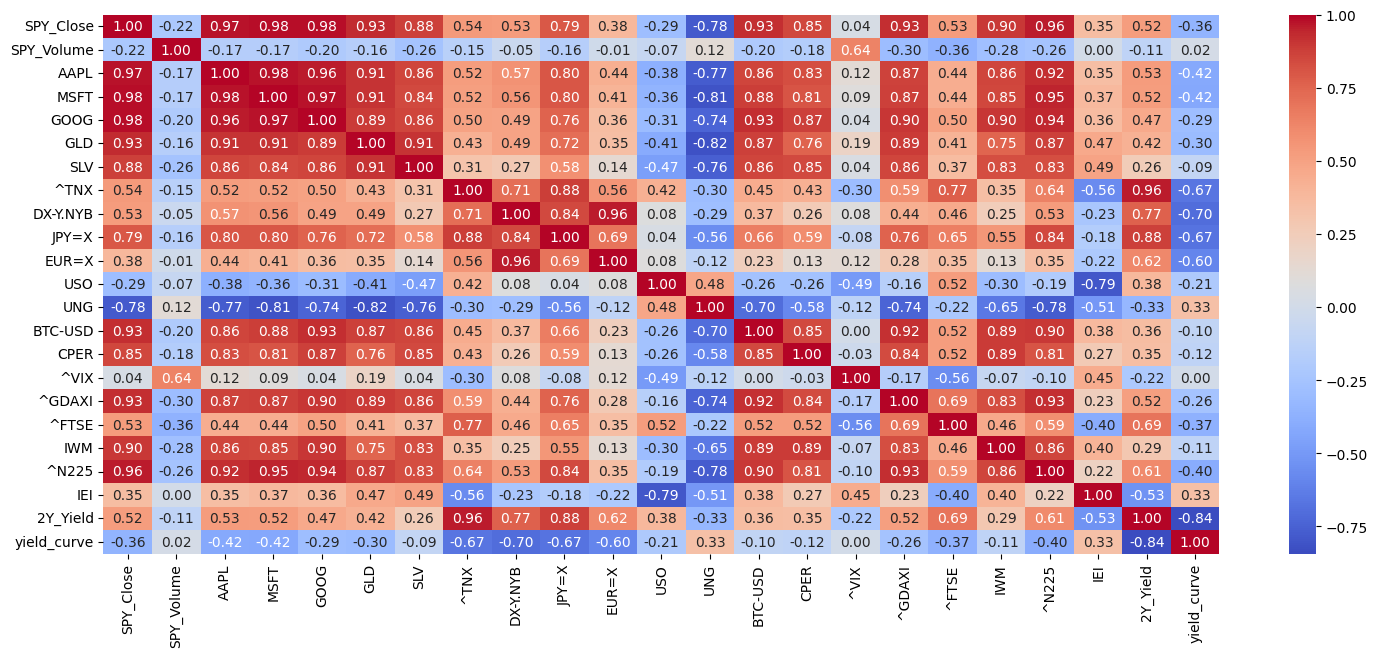

In [761]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 7))
sns.heatmap(combined_cleaned.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Indicators

# RSI

In [762]:
def RSI(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

In [763]:
combined_cleaned_add = combined_cleaned.copy()
combined_cleaned_add = pd.concat([combined_cleaned_add, add_later], axis=1)
combined_cleaned_add.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   AAPL                 2084 non-null   float64
 3   MSFT                 2084 non-null   float64
 4   GOOG                 2084 non-null   float64
 5   GLD                  2084 non-null   float64
 6   SLV                  2084 non-null   float64
 7   ^TNX                 2084 non-null   float64
 8   DX-Y.NYB             2084 non-null   float64
 9   JPY=X                2084 non-null   float64
 10  EUR=X                2084 non-null   float64
 11  USO                  2084 non-null   float64
 12  UNG                  2084 non-null   float64
 13  BTC-USD              2084 non-null   float64
 14  CPER                 2084 non-null   float64
 15  ^VIX                

In [764]:
combined_cleaned_add['SPY_RSI'] = RSI(combined_cleaned_add['SPY_Close'], period=14)
combined_cleaned_add[['SPY_RSI']].tail(30)
combined_cleaned_add['RSI_rank'] = combined_cleaned_add['SPY_RSI'].rank(pct=True)
combined_cleaned_add['RSI_rank_2'] = combined_cleaned_add['SPY_RSI'].apply(lambda x: 1 if x > 70 else (0 if x < 30 else -1))

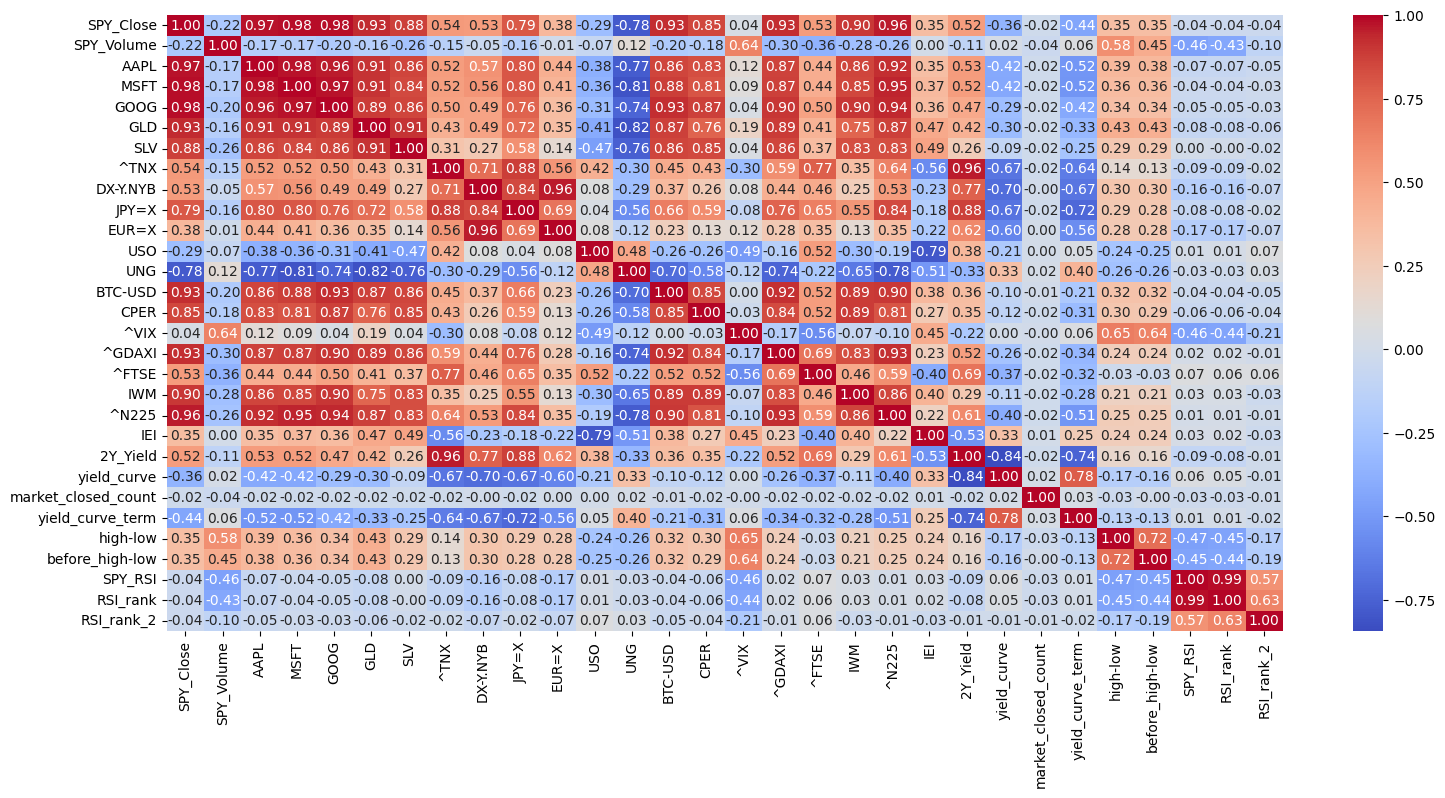

In [765]:
plt.figure(figsize=(18, 8))
sns.heatmap(combined_cleaned_add.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Add EMA

In [766]:
combined_cleaned_add['EMA_20'] = combined_cleaned_add['SPY_Close'].ewm(span=20, adjust=False).mean()
combined_cleaned_add['EMA_50'] = combined_cleaned_add['SPY_Close'].ewm(span=50, adjust=False).mean()
combined_cleaned_add['EMA_200'] = combined_cleaned_add['SPY_Close'].ewm(span=200, adjust=False).mean()

In [767]:
#combined_cleaned_add.info()
combined_cleaned_add['EMA_200'].tail(20)
# crorossing EMA:
combined_cleaned_add['EMA_20_50'] = np.where(combined_cleaned_add['EMA_20'] > combined_cleaned_add['EMA_50'], 1, 0)
combined_cleaned_add['EMA_50_200'] = np.where(combined_cleaned_add['EMA_50'] > combined_cleaned_add['EMA_200'], 1, 0)
# diff from EMA 50/200 by presantage
combined_cleaned_add['EMA_50_diff'] = (combined_cleaned_add['SPY_Close'] - combined_cleaned_add['EMA_50']) / combined_cleaned_add['SPY_Close']
combined_cleaned_add['EMA_200_diff'] = (combined_cleaned_add['SPY_Close'] - combined_cleaned_add['EMA_200']) / combined_cleaned_add['SPY_Close']


# Added columns:
EMA_20,EMA_50,EMA_200

EMA_20_50,EMA_50_200 : crossed

EMA_50_diff,EMA_200_diff : presantage diff

In [768]:
combined_cleaned_add[['EMA_20','EMA_50','EMA_200','EMA_20_50','EMA_50_200','EMA_50_diff','EMA_200_diff']].tail(30)

,EMA_20,EMA_50,EMA_200,EMA_20_50,EMA_50_200,EMA_50_diff,EMA_200_diff
Date,,,,,,,
2025-03-06,591.175452,593.403514,565.590105,0,1,-0.039249,0.009461
2025-03-07,589.558046,592.650149,565.675703,0,1,-0.032145,0.014833
2025-03-10,586.638113,591.326564,565.608270,0,1,-0.058021,-0.012005
2025-03-11,583.553786,589.872687,565.495279,0,1,-0.064267,-0.020284
2025-03-12,581.043316,588.591163,565.412678,0,1,-0.056349,-0.014750
2025-03-13,578.064540,587.068615,565.256991,0,1,-0.067851,-0.028177
2025-03-14,576.450966,586.051101,565.215847,0,1,-0.044427,-0.007296
2025-03-17,575.403163,585.243177,565.218168,0,1,-0.035006,0.000408
2025-03-18,573.873091,584.227264,565.159652,0,1,-0.044499,-0.010409


In [769]:
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SPY_Close    2084 non-null   float64
 1   SPY_Volume   2084 non-null   int64  
 2   AAPL         2084 non-null   float64
 3   MSFT         2084 non-null   float64
 4   GOOG         2084 non-null   float64
 5   GLD          2084 non-null   float64
 6   SLV          2084 non-null   float64
 7   ^TNX         2084 non-null   float64
 8   DX-Y.NYB     2084 non-null   float64
 9   JPY=X        2084 non-null   float64
 10  EUR=X        2084 non-null   float64
 11  USO          2084 non-null   float64
 12  UNG          2084 non-null   float64
 13  BTC-USD      2084 non-null   float64
 14  CPER         2084 non-null   float64
 15  ^VIX         2084 non-null   float64
 16  ^GDAXI       2084 non-null   float64
 17  ^FTSE        2084 non-null   float64
 18  IWM          2084 non-null   f

In [783]:
combined_cleaned_add.info()
# saving the added indicators data
combined_cleaned_add.to_csv('combined_cleaned_add.csv', index=False)
combined_cleaned_add.to_pickle('combined_cleaned_add.pkl')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_Close            2084 non-null   float64
 1   SPY_Volume           2084 non-null   int64  
 2   AAPL                 2084 non-null   float64
 3   MSFT                 2084 non-null   float64
 4   GOOG                 2084 non-null   float64
 5   GLD                  2084 non-null   float64
 6   SLV                  2084 non-null   float64
 7   ^TNX                 2084 non-null   float64
 8   DX-Y.NYB             2084 non-null   float64
 9   JPY=X                2084 non-null   float64
 10  EUR=X                2084 non-null   float64
 11  USO                  2084 non-null   float64
 12  UNG                  2084 non-null   float64
 13  BTC-USD              2084 non-null   float64
 14  CPER                 2084 non-null   float64
 15  ^VIX                

# Add gold silver ratio

In [770]:
combined_cleaned['GLD/SLV'] = combined_cleaned['GLD'] / combined_cleaned['SLV']
combined_cleaned['GLD/SLV'].tail(30)

Date
2025-03-06     9.035028
2025-03-07     9.070294
2025-03-10     9.139128
2025-03-11     8.983979
2025-03-12     8.945400
2025-03-13     8.950228
2025-03-14     8.962553
2025-03-17     8.981825
2025-03-18     9.074878
2025-03-19     9.141788
2025-03-20     9.204918
2025-03-21     9.276815
2025-03-24     9.254006
2025-03-25     9.106279
2025-03-26     9.113658
2025-03-27     9.002874
2025-03-28     9.163226
2025-03-31     9.297839
2025-04-01     9.388508
2025-04-02     9.368010
2025-04-03     9.914158
2025-04-04    10.329394
2025-04-07    10.085114
2025-04-08    10.140015
2025-04-09    10.170350
2025-04-10    10.337694
2025-04-11    10.206577
2025-04-14    10.082710
2025-04-15    10.125128
2025-04-16    10.331653
Name: GLD/SLV, dtype: float64

# Convert to presentage return

In [771]:
returns = combined_cleaned.pct_change()* 100
returns['^N225'] = returns['^N225'].fillna(0)
returns.head(10)


,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,IEI,2Y_Yield,yield_curve,GLD/SLV
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2017-01-04,0.594915,-13.814801,-0.111938,-0.447463,0.096670,0.353036,0.906738,0.081627,-0.494140,0.139575,...,2.463052,-7.782101,0.000599,0.164398,1.667657,0.000000,0.065282,1.639344,-1.463426,-0.548726
2017-01-05,-0.079461,-0.464033,0.508548,0.000000,0.904813,1.551507,1.155329,-3.425770,-1.148978,-0.464051,...,-0.961538,-1.518990,0.005446,0.077884,-1.154013,-0.374962,0.301877,-5.645161,-1.155105,0.391653
2017-01-06,0.357788,-8.700162,1.114819,0.866805,1.527671,-0.737255,-0.761421,2.111484,0.689524,-1.577963,...,-0.060681,-2.999146,0.121445,0.205694,-0.367114,-0.339944,-0.276536,4.273504,-0.000004,0.024351
2017-01-09,-0.330088,-34.405023,0.915944,-0.318284,0.062026,0.823265,0.383628,-1.736975,-0.283703,1.635364,...,0.728603,2.120148,-0.301918,0.384179,-0.655931,0.000000,0.195749,-0.819672,-2.671123,0.437956
2017-01-10,0.000000,35.859198,0.100852,-0.031929,-0.230588,0.426026,1.337580,0.126264,0.078487,-0.994452,...,2.712482,-0.605542,0.166980,0.520879,0.956951,-0.785895,0.016278,-1.652893,1.972558,-0.899522
2017-01-11,0.282611,17.057826,0.537308,0.910270,0.387682,0.309323,-0.251414,-0.378313,-0.225471,-0.097425,...,-0.880291,-2.001737,0.542765,0.206171,0.176382,0.327595,0.000000,0.840336,-1.597987,0.562150
2017-01-12,-0.250993,-3.398259,-0.417523,-0.917891,-0.191849,0.361237,0.252048,-0.379739,-0.422480,-0.667980,...,2.605095,2.486676,-1.074429,0.026060,-0.770215,-1.187579,0.097700,-1.666667,0.940186,0.108915
2017-01-13,0.229564,-13.028544,-0.176098,0.143748,0.188501,0.263362,0.188559,0.804746,-0.167734,-0.377068,...,1.500290,-2.686312,0.938627,0.622565,0.724447,0.797400,-0.154511,2.542373,-0.931409,0.074662


In [203]:

#returns = combined_cleaned.pct_change()* 100
#returns['000300.SS'].fillna(0)
#for col in combined_cleaned.columns:
#    if not col.endswith('_market_close') and f'{col}_market_close' in combined_cleaned.columns:
#        mask = combined_cleaned[f'{col}_market_close'] == 1
#        returns.loc[mask, col] = 0
#returns = returns.dropna()
#market_cols = [col for col in combined_cleaned.columns if col.endswith('_market_close')]
#combined_cleaned.drop(columns=market_cols, inplace=True)
#returns.drop(columns=market_cols, inplace=True)
#returns.tail(20)


In [772]:
#r= returns.copy()
#returns = pd.concat([returns,add_later],axis=1)
returns = returns.join(add_later, how='left')
returns.head()


,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,IWM,^N225,IEI,2Y_Yield,yield_curve,GLD/SLV,market_closed_count,yield_curve_term,high-low,before_high-low
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,2,1.0,1.702890,NaN
2017-01-04,0.594915,-13.814801,-0.111938,-0.447463,0.096670,0.353036,0.906738,0.081627,-0.494140,0.139575,...,1.667657,0.000000,0.065282,1.639344,-1.463426,-0.548726,0,1.0,0.995537,1.702890
2017-01-05,-0.079461,-0.464033,0.508548,0.000000,0.904813,1.551507,1.155329,-3.425770,-1.148978,-0.464051,...,-1.154013,-0.374962,0.301877,-5.645161,-1.155105,0.391653,0,1.0,0.960611,0.995537
2017-01-06,0.357788,-8.700162,1.114819,0.866805,1.527671,-0.737255,-0.761421,2.111484,0.689524,-1.577963,...,-0.367114,-0.339944,-0.276536,4.273504,-0.000004,0.024351,0,1.0,1.615570,0.960611
2017-01-09,-0.330088,-34.405023,0.915944,-0.318284,0.062026,0.823265,0.383628,-1.736975,-0.283703,1.635364,...,-0.655931,0.000000,0.195749,-0.819672,-2.671123,0.437956,1,1.0,0.567639,1.615570


In [ ]:
#returns = returns.iloc[1:] # remove the first raw because its null

In [773]:
returns['SPY_Close'].min()


np.float64(-10.942363295390711)

# Add streak days 
Number of consecetive days down/up

In [774]:
# Step 1: Get the direction of return
direction = np.sign(returns['SPY_Close'].fillna(0))

# Step 2: Shift it down so current row gets info about previous days only
shifted_direction = direction.shift(1).fillna(0)

# Step 3: Build the streak
streak = []
count = 0

for change in shifted_direction:
    if change == 0:
        count = 0
    elif change > 0:
        count = count + 1 if count >= 0 else 1
    else:
        count = count - 1 if count <= 0 else -1
    streak.append(count)

# Step 4: Add to DataFrame
returns['SPY_Streak'] = streak

In [775]:

returns = returns.rename(columns={'SPY_Close':'SPY_return'}) #rename the column
returns.head(10)

,SPY_return,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,^N225,IEI,2Y_Yield,yield_curve,GLD/SLV,market_closed_count,yield_curve_term,high-low,before_high-low,SPY_Streak
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,2,1.0,1.702890,NaN,0
2017-01-04,0.594915,-13.814801,-0.111938,-0.447463,0.096670,0.353036,0.906738,0.081627,-0.494140,0.139575,...,0.000000,0.065282,1.639344,-1.463426,-0.548726,0,1.0,0.995537,1.702890,0
2017-01-05,-0.079461,-0.464033,0.508548,0.000000,0.904813,1.551507,1.155329,-3.425770,-1.148978,-0.464051,...,-0.374962,0.301877,-5.645161,-1.155105,0.391653,0,1.0,0.960611,0.995537,1
2017-01-06,0.357788,-8.700162,1.114819,0.866805,1.527671,-0.737255,-0.761421,2.111484,0.689524,-1.577963,...,-0.339944,-0.276536,4.273504,-0.000004,0.024351,0,1.0,1.615570,0.960611,-1
2017-01-09,-0.330088,-34.405023,0.915944,-0.318284,0.062026,0.823265,0.383628,-1.736975,-0.283703,1.635364,...,0.000000,0.195749,-0.819672,-2.671123,0.437956,1,1.0,0.567639,1.615570,1
2017-01-10,0.000000,35.859198,0.100852,-0.031929,-0.230588,0.426026,1.337580,0.126264,0.078487,-0.994452,...,-0.785895,0.016278,-1.652893,1.972558,-0.899522,0,1.0,1.257523,0.567639,-1
2017-01-11,0.282611,17.057826,0.537308,0.910270,0.387682,0.309323,-0.251414,-0.378313,-0.225471,-0.097425,...,0.327595,0.000000,0.840336,-1.597987,0.562150,0,1.0,1.318658,1.257523,0
2017-01-12,-0.250993,-3.398259,-0.417523,-0.917891,-0.191849,0.361237,0.252048,-0.379739,-0.422480,-0.667980,...,-1.187579,0.097700,-1.666667,0.940186,0.108915,0,1.0,1.563162,1.318658,1
2017-01-13,0.229564,-13.028544,-0.176098,0.143748,0.188501,0.263362,0.188559,0.804746,-0.167734,-0.377068,...,0.797400,-0.154511,2.542373,-0.931409,0.074662,0,1.0,0.620020,1.563162,-1


In [776]:
# Step 1: Convert percent returns to multipliers
multipliers = 1 + (returns['SPY_return'].fillna(0) / 100)
streaks = returns['SPY_Streak'].fillna(0)

# Step 2: Initialize result list
abs_changes = []

for i in range(len(returns)):
    streak = streaks.iloc[i]

    if abs(streak) <= 1:
        # Use previous day's return as-is
        abs_changes.append(returns['SPY_return'].iloc[i - 1] if i > 0 else np.nan)
    else:
        length = abs(int(streak))
        start_idx = i - length
        if start_idx < 0:
            abs_changes.append(np.nan)
        else:
            # Compute cumulative return from previous 'length' days
            cumulative_return = multipliers.iloc[start_idx:i].prod()
            abs_changes.append((cumulative_return - 1) * 100)

# Step 3: Assign the result
returns['SPY_AbsChange'] = abs_changes


In [707]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1330 entries, 2020-01-02 to 2025-04-16
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SPY_return           1329 non-null   float64
 1   SPY_Volume           1329 non-null   float64
 2   AAPL                 1329 non-null   float64
 3   MSFT                 1329 non-null   float64
 4   GOOG                 1329 non-null   float64
 5   GLD                  1329 non-null   float64
 6   SLV                  1329 non-null   float64
 7   ^TNX                 1329 non-null   float64
 8   DX-Y.NYB             1329 non-null   float64
 9   JPY=X                1329 non-null   float64
 10  EUR=X                1329 non-null   float64
 11  USO                  1329 non-null   float64
 12  UNG                  1329 non-null   float64
 13  BTC-USD              1329 non-null   float64
 14  CPER                 1329 non-null   float64
 15  ^VIX                

In [777]:
returns = returns.iloc[2:] # remove the first 2 raws because its null
returns.head()

,SPY_return,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,IEI,2Y_Yield,yield_curve,GLD/SLV,market_closed_count,yield_curve_term,high-low,before_high-low,SPY_Streak,SPY_AbsChange
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-05,-0.079461,-0.464033,0.508548,0.000000,0.904813,1.551507,1.155329,-3.425770,-1.148978,-0.464051,...,0.301877,-5.645161,-1.155105,0.391653,0,1.0,0.960611,0.995537,1,0.594915
2017-01-06,0.357788,-8.700162,1.114819,0.866805,1.527671,-0.737255,-0.761421,2.111484,0.689524,-1.577963,...,-0.276536,4.273504,-0.000004,0.024351,0,1.0,1.615570,0.960611,-1,-0.079461
2017-01-09,-0.330088,-34.405023,0.915944,-0.318284,0.062026,0.823265,0.383628,-1.736975,-0.283703,1.635364,...,0.195749,-0.819672,-2.671123,0.437956,1,1.0,0.567639,1.615570,1,0.357788
2017-01-10,0.000000,35.859198,0.100852,-0.031929,-0.230588,0.426026,1.337580,0.126264,0.078487,-0.994452,...,0.016278,-1.652893,1.972558,-0.899522,0,1.0,1.257523,0.567639,-1,-0.330088
2017-01-11,0.282611,17.057826,0.537308,0.910270,0.387682,0.309323,-0.251414,-0.378313,-0.225471,-0.097425,...,0.000000,0.840336,-1.597987,0.562150,0,1.0,1.318658,1.257523,0,0.000000


In [778]:
r= returns.copy()
r.reset_index( inplace=True) # reset the index
r.rename(columns={'Date':'ds'}, inplace=True) # rename the column
r['ds'].head()

0   2017-01-05
1   2017-01-06
2   2017-01-09
3   2017-01-10
4   2017-01-11
Name: ds, dtype: datetime64[ns]

In [779]:

returns.reset_index( inplace=True) # reset the index
returns.rename(columns={'Date':'ds'}, inplace=True) # rename the column
returns['ds'].head()

0   2017-01-05
1   2017-01-06
2   2017-01-09
3   2017-01-10
4   2017-01-11
Name: ds, dtype: datetime64[ns]

In [780]:

returns['ds'].head()
returns['day'] = returns['ds'].dt.day
returns['month'] = returns['ds'].dt.month

In [781]:
returns = returns.dropna()

In [782]:
combined_cleaned.to_pickle('Raw_stocks_data')
returns.to_pickle('data_for_model')
#returns.to_csv('data_for_model.csv',index=False)

In [596]:
returns.head() # the file with events and date as ds 

,SPY_return,SPY_Volume,high-low,before_high-low,AAPL,MSFT,GOOG,GLD,SLV,^TNX,...,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,ds,SPY_Streak,SPY_AbsChange,month,day,GLD/SLV
2,-0.281178,-27.235288,-61.424082,32.677733,0.796800,0.258498,2.465741,1.048950,0.593826,1.286354,...,-3.164557,35.096157,0,1.0,2020-01-07,1,0.381509,7,1,1.766425
3,0.532975,68.647090,139.226323,-61.424082,-0.470306,-0.911765,-0.062415,0.393515,1.357730,0.883492,...,0.653595,2.135243,0,1.0,2020-01-08,-1,-0.281178,8,1,0.289833
4,0.678054,-29.024687,-61.092362,139.226323,1.608634,1.592805,0.788053,-0.750152,-1.397785,2.572519,...,0.000000,16.376281,0,1.0,2020-01-09,1,0.532975,9,1,0.536672
5,-0.287784,9.398989,86.771727,-61.092362,2.124099,1.249292,1.104436,-0.565165,-1.240407,-0.853784,...,2.597403,-16.766443,0,1.0,2020-01-10,2,1.214643,10,1,0.455629
6,0.687757,-11.206069,-9.734636,86.771727,0.226054,-0.462695,0.697280,0.602619,1.016747,-1.776103,...,0.000000,-11.870499,0,1.0,2020-01-13,-1,-0.287784,13,1,0.592693
